# 2. Kaggle Submission

## Table of Content:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Train Data](#Train-Data)
    - [Test Data](#Train-Data)
- [Data Modelling](#Data-Modelling)
- [Kaggle Submission](#Kaggle-Submission)

**Importing libraries and packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

Creating dataframes from cleaned datasets

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [3]:
test = pd.read_csv('../datasets/test_clean.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,2,Reg,Lvl,AllPub,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1,0.0,1,0.0,1020.0,1020.0,GasA,4,0,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1.0,440.0,1,1,2,0,60,112,0,0,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,69.630042,9662,2,IR1,Lvl,AllPub,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1,0.0,1,0.0,1967.0,1967.0,GasA,3,1,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2.0,580.0,3,3,2,170,0,0,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,2,IR1,Lvl,AllPub,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,6,554.0,1,0.0,100.0,654.0,GasA,5,1,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2.0,426.0,3,3,2,100,24,0,0,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,2,Reg,Lvl,AllPub,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1,0.0,1,0.0,968.0,968.0,GasA,3,1,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2.0,480.0,2,3,0,0,0,184,0,0,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,69.630042,9500,2,IR1,Lvl,AllPub,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609.0,1,0.0,785.0,1394.0,GasA,4,1,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2.0,514.0,3,3,2,0,76,0,0,185,0,0,0,0,7,2009,WD


In [4]:
train = pd.read_csv('../datasets/train_clean.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.066279,13517,2,IR1,Lvl,AllPub,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,2,IR1,Lvl,AllPub,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,2,Reg,Lvl,AllPub,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,2,Reg,Lvl,AllPub,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,2,IR1,Lvl,AllPub,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,0,3,2010,WD,138500


## Exploratory Data Analysis

### Train Data

Let's first drop features that do not logically contribute to the change in price.

In [5]:
train.drop(columns=['Id','PID'],inplace=True)

Overall Cond and Overall Qual are a representation of all features. I will drop them to work with a more granular data.

In [6]:
train.drop(columns=['Overall Qual','Overall Cond'],inplace=True)

In [7]:
train.drop(columns='Year Built',inplace=True)

Since year remodelled will be equal to the year built if there was no remodelling done, I have dropped the Year Built Feature

In [8]:
train.drop(columns=['Garage Cars'],inplace=True)

Since Garage Cars (Garage Cars shows number of cars that could fit the garage) is basically a subset of garage area (also shown by the high correlation coefficient), I have dropped Garage Cars

In [9]:
train['Total Bath'] = train['Full Bath'] + train['Half Bath'] + train['Bsmt Full Bath'] + train['Bsmt Half Bath']
train.drop(columns=['Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

Adding all bathrooms together.

In [10]:
#Creating Dummy Variables for Categorical Values
train = pd.get_dummies(train,drop_first=True)

Checking the highly correlated features to sale against against the multicollinearity table to see if they are correlated.

In [11]:
cor = train.corr()
#Correlation with output variable
cor_target = abs(cor['SalePrice'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Year Remod/Add      0.550589
Mas Vnr Area        0.503530
Exter Qual          0.712124
Bsmt Qual           0.612364
Total Bsmt SF       0.629273
1st Flr SF          0.618451
Gr Liv Area         0.697261
Kitchen Qual        0.692587
TotRms AbvGrd       0.503990
Fireplace Qu        0.538886
Garage Finish       0.557999
Garage Area         0.650270
SalePrice           1.000000
Total Bath          0.609608
Foundation_PConc    0.529002
Name: SalePrice, dtype: float64

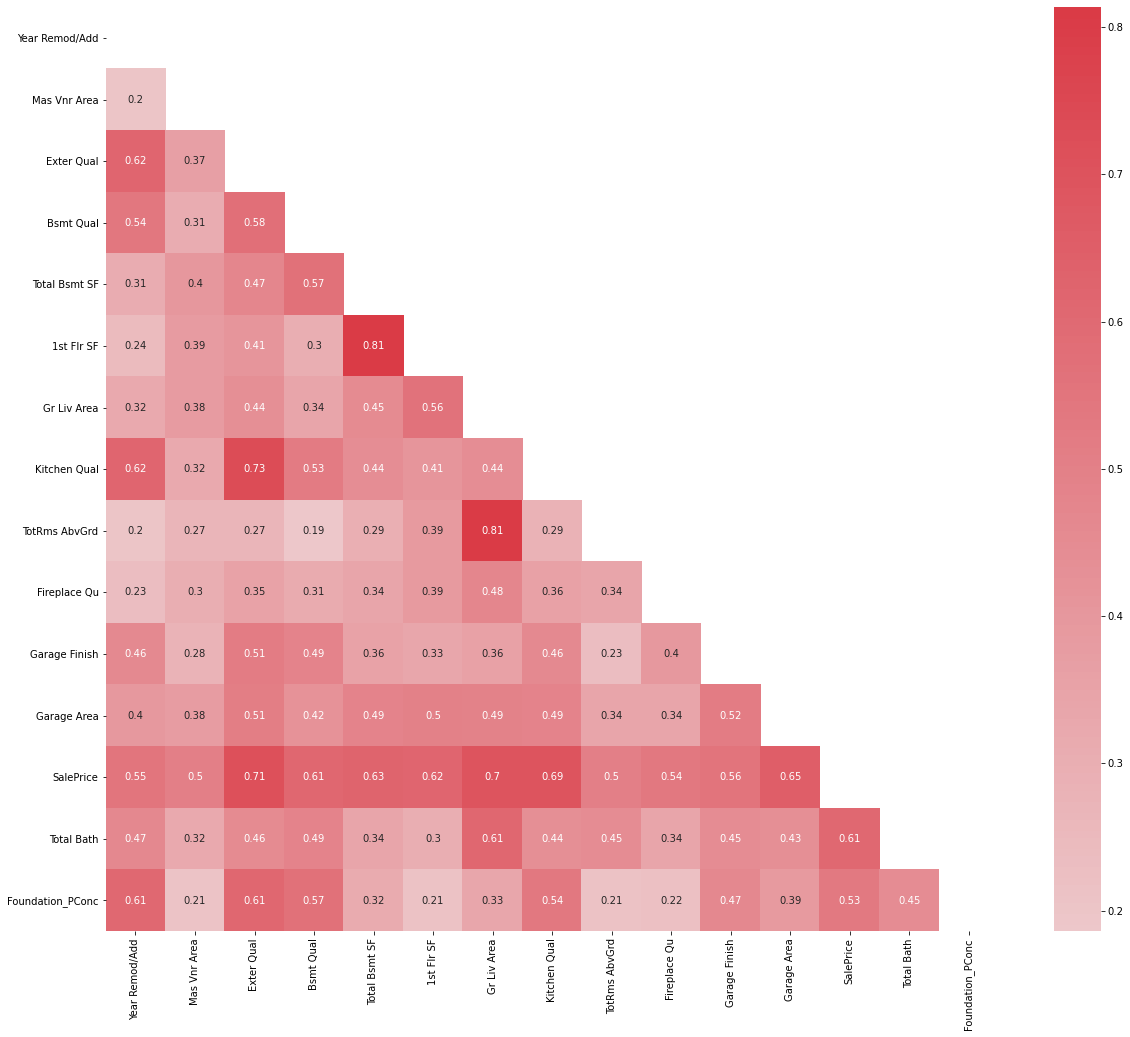

In [12]:
plt.figure(figsize=(20,17))
mask = np.triu(train[relevant_features.index].corr())
sns.heatmap(train[relevant_features.index].corr(), annot=True, center = 0, cmap = sns.diverging_palette(220, 10, as_cmap=True),mask=mask);

In [13]:
new_train = train[relevant_features.index.tolist()]

Checking the new features for linearity.

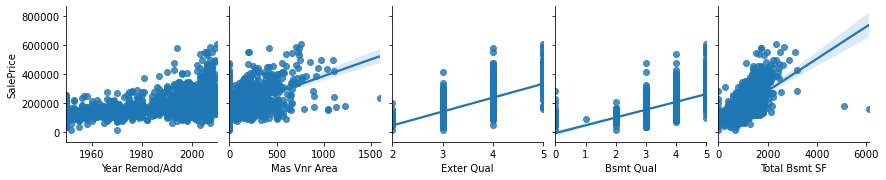

In [14]:
sns.pairplot(new_train, y_vars="SalePrice", x_vars=new_train.columns[0:5],kind='reg',diag_kind=None);

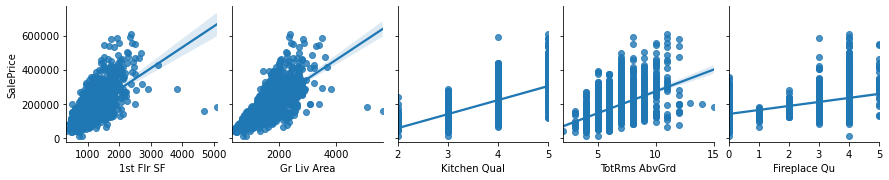

In [15]:
sns.pairplot(new_train, y_vars="SalePrice", x_vars=new_train.columns[5:10],kind='reg',diag_kind=None);

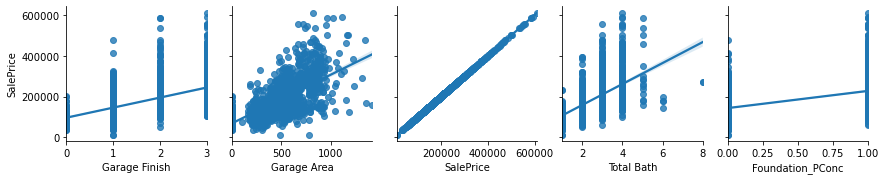

In [16]:
sns.pairplot(new_train, y_vars="SalePrice", x_vars=new_train.columns[10:15],kind='reg',diag_kind=None);

### Test Data

In [17]:
test.drop(columns=['Id','PID','Overall Qual','Overall Cond','Year Built','Garage Cars'],inplace=True)

In [18]:
test['Total Bath'] = test['Full Bath'] + test['Half Bath'] + test['Bsmt Full Bath'] + test['Bsmt Half Bath']
test.drop(columns=['Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

In [19]:
test = pd.get_dummies(test,drop_first=True)

In [21]:
new_test = test[['Year Remod/Add','Mas Vnr Area','Exter Qual','Bsmt Qual','Total Bsmt SF','1st Flr SF','Gr Liv Area','Kitchen Qual','TotRms AbvGrd','Fireplace Qu','Garage Finish','Garage Area','Total Bath','Foundation_PConc']]

## Data Modelling

In [22]:
X = new_train.drop(columns='SalePrice')
y = new_train['SalePrice']

In [23]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,random_state=42)

In [24]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [25]:
lr = LinearRegression()

In [26]:
#Ridge Model
ridge = RidgeCV(alphas=np.linspace(0.1,10,100))

In [27]:
#Lasso Model
lasso = LassoCV(n_alphas=100)

In [28]:
#Estimate of Test R2 using cross validation
lr_cv_scores = cross_val_score(lr, X_train_scaled,y_train, cv=5)
lr_cv_scores.mean()

0.7821698538601745

In [29]:
lr_cv_mse_scores = -cross_val_score(lr, X_train_scaled,y_train, cv=5,scoring ='neg_mean_squared_error')
lr_cv_mse_scores.mean()

1346903584.5375843

In [30]:
ridge_cv_scores = cross_val_score(ridge,X_train_scaled,y_train,cv=5)
ridge_cv_scores.mean()

0.7826810428330406

In [31]:
ridge_cv_mse_scores = -cross_val_score(ridge,X_train_scaled,y_train,cv=5, scoring ='neg_mean_squared_error')
ridge_cv_mse_scores.mean()

1344129986.2411678

In [32]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled,y_train, cv=5)
lasso_cv_scores.mean()

0.7824855107855635

In [33]:
lasso_cv_mse_scores = -cross_val_score(lasso, X_train_scaled,y_train, cv=5,scoring ='neg_mean_squared_error')
lasso_cv_mse_scores.mean()

1345621346.2636323

In [34]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [35]:
ridge.alpha_

10.0

In [36]:
ridge.score(X_train_scaled,y_train)

0.7988312179809618

In [37]:
ridge.score(X_test_scaled,y_test)

0.8487199648872231

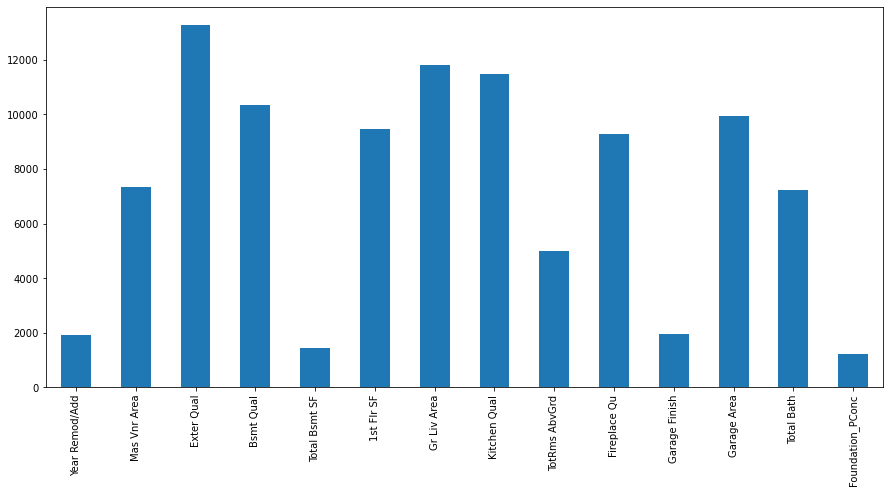

In [38]:
pd.Series(ridge.coef_, index=X.columns).plot.bar(figsize=(15,7));

In [39]:
lasso.fit(X_train_scaled,y_train)

LassoCV()

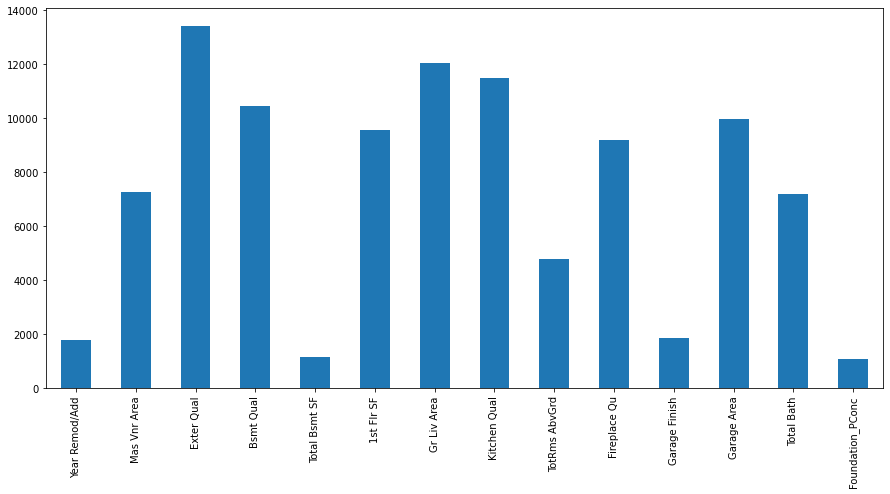

In [40]:
pd.Series(lasso.coef_, index=X.columns).plot.bar(figsize=(15,7));

In [41]:
print("Training R2(Lasso) " + str(lasso.score(X_train_scaled,y_train)))
print("Testing R2(Lasso) " + str(lasso.score(X_test_scaled,y_test)))
print("Estimate of Testing R2(Lasso) " + str(lasso_cv_scores.mean()))

Training R2(Lasso) 0.7988265056787194
Testing R2(Lasso) 0.8485925237576109
Estimate of Testing R2(Lasso) 0.7824855107855635


In [42]:
print("Training MSE(Lasso) " + str(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print("Testing MSE(Lasso) " + str(mean_squared_error(y_test,lasso.predict(X_test_scaled))))

print("Estimate of Testing RMSE (Lasso) " + str(np.sqrt(lasso_cv_mse_scores.mean())))

Training MSE(Lasso) 1265754047.771252
Testing MSE(Lasso) 946188038.3883812
Estimate of Testing RMSE (Lasso) 36682.71181719847


In [43]:
print("Training R2(ridge) " + str(ridge.score(X_train_scaled,y_train)))
print("Testing R2(ridge) " + str(ridge.score(X_test_scaled,y_test)))
print("Estimate of Testing R2(ridge) " + str(ridge_cv_scores.mean()))

Training R2(ridge) 0.7988312179809618
Testing R2(ridge) 0.8487199648872231
Estimate of Testing R2(ridge) 0.7826810428330406


In [44]:
print("Training MSE(ridge) " + str(mean_squared_error(y_train, ridge.predict(X_train_scaled))))
print("Testing MSE(ridge) " + str(mean_squared_error(y_test,ridge.predict(X_test_scaled))))
print("Estimate of Testing RMSE(ridge) " + str(np.sqrt(ridge_cv_mse_scores.mean())))

Training MSE(ridge) 1265724398.6583912
Testing MSE(ridge) 945391622.8121464
Estimate of Testing RMSE(ridge) 36662.3783494902


In [45]:
lr.fit(X_train_scaled,y_train)

print("Training R2(LR) " + str(lr.score(X_train_scaled,y_train)))
print("Testing R2(LR) " + str(lr.score(X_test_scaled,y_test)))

print("Estimate of Testing R2 (LR)" + str(lr_cv_scores.mean()))

Training R2(LR) 0.7988372339680702
Testing R2(LR) 0.8487086477473565
Estimate of Testing R2 (LR)0.7821698538601745


In [46]:
print("Training MSE(LR) " + str(mean_squared_error(y_train, lr.predict(X_train_scaled))))
print("Testing MSE(LR) " + str(mean_squared_error(y_test,lr.predict(X_test_scaled))))

print("Estimate of Testing RMSE (LR)" + str(np.sqrt(lr_cv_mse_scores.mean())))

Training MSE(LR) 1265686546.952035
Testing MSE(LR) 945462346.8122838
Estimate of Testing RMSE (LR)36700.18507497727


## Kaggle Submission

In [47]:
Xtest = new_test

Xtest_scaled = ss.transform(Xtest)


In [48]:
kaggle_submission = pd.read_csv('../datasets/sample_sub_reg.csv')

In [49]:
kaggle_submission['SalePrice'] = ridge.predict(Xtest_scaled).tolist()

In [50]:
kaggle_submission['SalePrice'] = kaggle_submission['SalePrice'].round(4)

In [51]:
kaggle_submission

,Id,SalePrice
0,2,116884.8088
1,4,202559.4576
2,6,218983.8529
3,7,133715.0564
4,17,192888.4286
...,...,...
874,2919,180935.8464
875,2921,245739.4817
876,2922,126983.5533
877,2925,107135.3443


In [52]:
kaggle_submission.to_csv(path_or_buf='../datasets/test_kaggle_submission.csv',index=False)